## Insurance 비용 예측 모델

목표 : 연속형 데이터의 regression 예측 모델

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
insurance_df = pd.read_csv("data-files/insurance.csv")

In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# sex
print(insurance_df['sex'].value_counts())
print(insurance_df['sex'].isna().sum())

male      676
female    662
Name: sex, dtype: int64
0


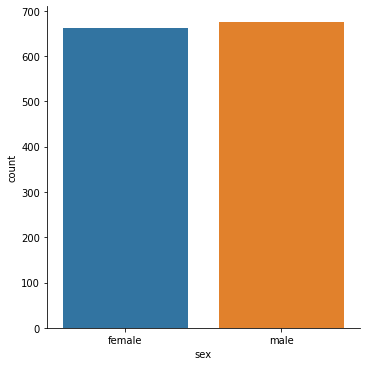

In [7]:
sns.catplot(data=insurance_df, x='sex', kind='count') # 범주형 데이터에 적합하게 시각화 (cf. relplot 관계형 데이터)
plt.show()

In [8]:
insurance_df = insurance_df.join(pd.get_dummies(insurance_df['sex'], drop_first=False))
insurance_df.drop('sex', axis=1, inplace=True)
insurance_df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


In [9]:
# smokervalue_counts
print(insurance_df['smoker'].value_counts())
print(insurance_df['smoker'].isna().sum())

no     1064
yes     274
Name: smoker, dtype: int64
0


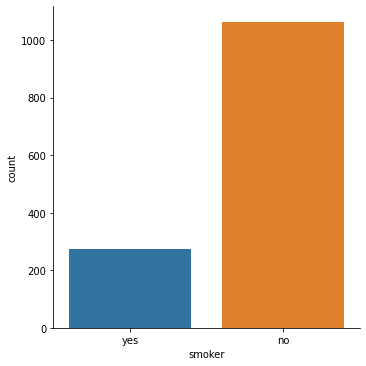

In [10]:
sns.catplot(data=insurance_df, x='smoker', kind='count') # 범주형 데이터에 적합하게 시각화 (cf. relplot 관계형 데이터)
plt.show()

In [11]:
insurance_df = insurance_df.join(pd.get_dummies(insurance_df['smoker'], drop_first=False))
insurance_df.drop('smoker', axis=1, inplace=True)
insurance_df.head()

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


In [12]:
# region
print(insurance_df['region'].value_counts())
print(insurance_df['region'].isna().sum())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64
0


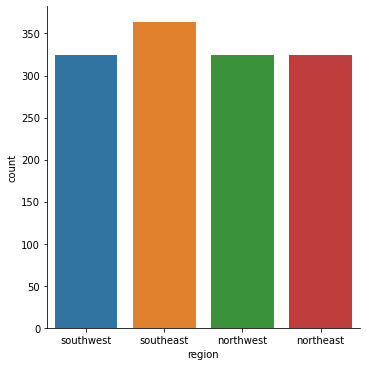

In [13]:
sns.catplot(data=insurance_df, x='region', kind='count') # 범주형 데이터에 적합하게 시각화 (cf. relplot 관계형 데이터)
plt.show()

In [14]:
insurance_df = insurance_df.join(pd.get_dummies(insurance_df['region'], drop_first=False))
insurance_df.drop('region', axis=1, inplace=True)
insurance_df.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
# age
print( insurance_df['age'].describe() )

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


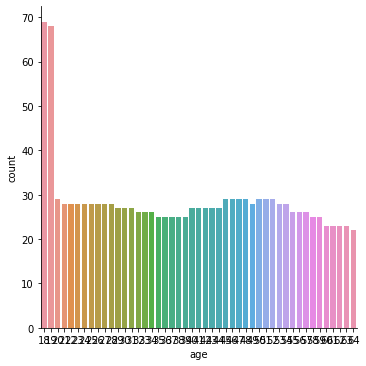

In [16]:
sns.catplot(data=insurance_df, x='age', kind='count')
plt.show()

In [17]:
insurance_df['age'] = insurance_df['age'].map(lambda x: 'under 20' if x < 20
                                              else '20s' if x < 30
                                              else '30s' if x < 40
                                             else '40s' if x < 50
                                             else '50s' if x < 60
                                             else '60s')

insurance_df = insurance_df.join(pd.get_dummies(insurance_df['age'], drop_first=False))

insurance_df.drop(['age'], axis=1, inplace=True)
insurance_df.head(3)

,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest,20s,30s,40s,50s,60s,under 20
0,27.90,0,16884.9240,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,33.77,1,1725.5523,0,1,1,0,0,0,1,0,0,0,0,0,0,1
2,33.00,3,4449.4620,0,1,1,0,0,0,1,0,1,0,0,0,0,0


In [18]:
# bmi
insurance_df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [19]:
insurance_df['bmi'] = insurance_df['bmi'].map(lambda x: 'Low Weight' if x < 18.5
                                              else 'Normal Weight' if x < 23
                                              else 'Over Weight' if x < 25
                                             else 'Obese' if x < 30
                                             else 'High Obese')

insurance_df = insurance_df.join(pd.get_dummies(insurance_df['bmi'], drop_first=False))

insurance_df.drop(['bmi'], axis=1, inplace=True)
insurance_df.head(3)

,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest,...,30s,40s,50s,60s,under 20,High Obese,Low Weight,Normal Weight,Obese,Over Weight
0,0,16884.9240,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,1,1725.5523,0,1,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,3,4449.4620,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# target / features
X = insurance_df.drop("charges", axis=1)
y = insurance_df['charges']

In [21]:
y.value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

In [22]:
# train / test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(1070, 20)

In [24]:
X_test.shape

(268, 20)

In [25]:
# model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# score

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7485381114009164, 0.7778558851130004)

In [27]:
# predict

prediction = lr.predict(X_test[:10])
print(prediction)
print(y_test[:10])

[ 8048.  7992. 36538.  8132. 28442.  8240.  -622. 16716.  -338.  8134.]
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
1312     4536.25900
899      2117.33885
752     14210.53595
1286     3732.62510
707     10264.44210
Name: charges, dtype: float64


### Neural Network Models

In [28]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(max_iter=500)
mlpr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [29]:
# score
mlpr.score(X_train, y_train), mlpr.score(X_test, y_test)

(-0.205261224626053, -0.1713889734608216)

In [30]:
# predict
prediction = mlpr.predict(X_test[:10])
print(prediction)
print(y_test[:10])

[8629.55938476 6454.74844937 6631.77196653 9719.68892727 6541.7958208
 7563.76511746 6235.20871751 6542.17054641 6038.57654339 9719.68892727]
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
1312     4536.25900
899      2117.33885
752     14210.53595
1286     3732.62510
707     10264.44210
Name: charges, dtype: float64


### SVM

In [31]:
from sklearn.svm import LinearSVR, SVR

lsvr = LinearSVR()
lsvr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [32]:
lsvr.score(X_train, y_train), lsvr.score(X_test, y_test)

(-0.7107862363458499, -0.6222847041944788)

In [33]:
prediction = lsvr.predict(X_test[:10])
print(prediction)
print(y_test[:10])

[4204. 2511. 1916. 5058. 1909. 3366. 1943. 2368. 2013. 5058.]
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
1312     4536.25900
899      2117.33885
752     14210.53595
1286     3732.62510
707     10264.44210
Name: charges, dtype: float64


In [34]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
svr.score(X_train, y_train), svr.score(X_test, y_test)

(-0.09475717562194408, -0.0705910736176465)

In [36]:
print( svr.predict(X_test[:10]) )
print( y_test[:10] )

[9580.27670663 9578.56702087 9629.39946821 9591.05786609 9625.21848421
 9576.37593203 9579.72864444 9602.86886551 9581.29163184 9591.05786609]
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
1312     4536.25900
899      2117.33885
752     14210.53595
1286     3732.62510
707     10264.44210
Name: charges, dtype: float64
